In [57]:
from google.colab import files

!pip install -q kaggle
# files.upload()
! mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           8984  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5498  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1979  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2377  
prom

In [58]:
# Download Data
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection
!ls

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  sample_data
brain_tumor_dataset				no	     yes


In [59]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [158]:
# Load Data
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [159]:
data_dir = pathlib.Path('/content/brain_tumor_dataset')
data_dir

PosixPath('/content/brain_tumor_dataset')

In [160]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

253


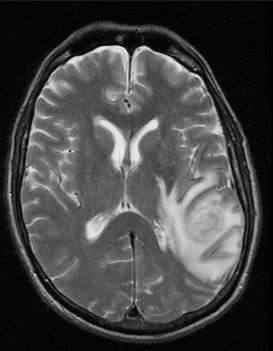

In [161]:
yes = list(data_dir.glob('yes/*'))
PIL.Image.open(str(yes[0]))

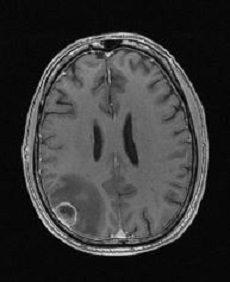

In [162]:
no = list(data_dir.glob('no/*'))
PIL.Image.open(str(no[0]))

In [163]:
batch_size = 32
img_height = 350
img_width = 300

In [164]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #labels=None,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [165]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #labels=None,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [166]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


In [167]:
class_names = val_ds.class_names
print(class_names)

['no', 'yes']


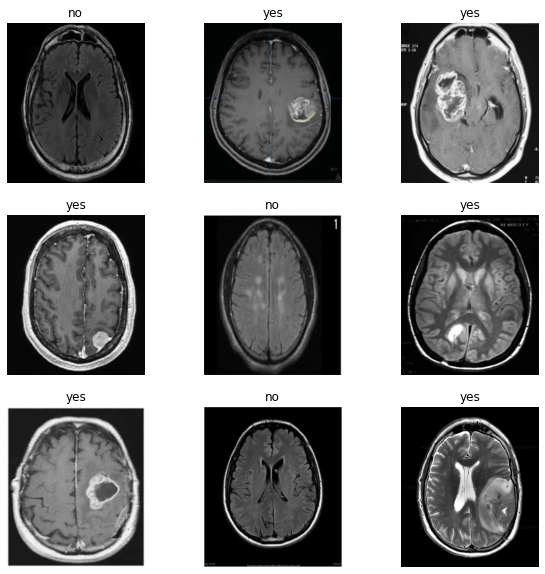

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [169]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [170]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image)) 

In [176]:
num_classes = 1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [177]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [173]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 350, 300, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 350, 300, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 175, 150, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 175, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 87, 75, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 87, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 43, 37, 64)       

In [174]:
train_ds

<BatchDataset shapes: ((None, 350, 300, 3), (None,)), types: (tf.float32, tf.int32)>

In [178]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 21s 3s/step - loss: 2.3340 - accuracy: 0.5320 - val_loss: 0.5935 - val_accuracy: 0.6600
Epoch 2/10
7/7 [==============================] - 20s 3s/step - loss: 0.5117 - accuracy: 0.7931 - val_loss: 0.5646 - val_accuracy: 0.8000
Epoch 3/10
7/7 [==============================] - 20s 3s/step - loss: 0.4543 - accuracy: 0.8079 - val_loss: 0.5307 - val_accuracy: 0.8000
Epoch 4/10
7/7 [==============================] - 20s 3s/step - loss: 0.3585 - accuracy: 0.8522 - val_loss: 0.6023 - val_accuracy: 0.7800
Epoch 5/10
7/7 [==============================] - 20s 3s/step - loss: 0.3222 - accuracy: 0.8670 - val_loss: 0.6339 - val_accuracy: 0.8200
Epoch 6/10
7/7 [==============================] - 21s 3s/step - loss: 0.2356 - accuracy: 0.8916 - val_loss: 0.5694 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 0.1469 - accuracy: 0.9409 - val_loss: 0.5828 - val_accuracy: 0.8400
Epoch 8/10
7/7 [==================

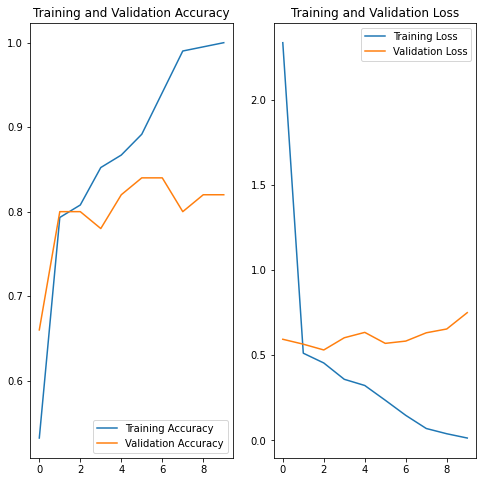

In [179]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [180]:
model.evaluate(val_ds)

2/2 [==============================] - 1s 487ms/step - loss: 0.7497 - accuracy: 0.8200


[0.7496766448020935, 0.8199999928474426]

In [181]:
prediction = model.predict(val_ds)

prediction

array([[7.14823544e-01],
       [4.13874686e-01],
       [9.95289803e-01],
       [2.33919536e-07],
       [9.77712393e-01],
       [6.58849418e-01],
       [1.60694122e-04],
       [8.83893728e-01],
       [9.99974370e-01],
       [7.26110637e-01],
       [9.99602914e-01],
       [3.54014635e-02],
       [1.33525709e-05],
       [9.97547150e-01],
       [1.16603434e-01],
       [9.98417616e-01],
       [9.99999762e-01],
       [9.98771906e-01],
       [5.73149323e-03],
       [1.09033585e-02],
       [9.99994636e-01],
       [3.16001242e-05],
       [9.26166415e-01],
       [9.63812828e-01],
       [9.99786377e-01],
       [9.99968767e-01],
       [2.03407744e-05],
       [9.99613702e-01],
       [9.23708856e-01],
       [2.09087521e-01],
       [9.99999642e-01],
       [1.34170193e-07],
       [9.99908805e-01],
       [9.98794794e-01],
       [9.99864340e-01],
       [9.91640806e-01],
       [8.14562678e-01],
       [5.00909090e-02],
       [9.99459505e-01],
       [9.67267871e-01],
